In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(seed=777)
#Fake some data for exhibition purpose
X = np.random.uniform(0,1,500)
X = X.reshape(-1,10)
print(X)
#This is a 50 by 10 dataset

import pandas as pd

[[0.15266373 0.30235661 0.06203641 0.45986034 0.83525338 0.92699705
  0.72698898 0.76849622 0.26920507 0.64402929]
 [0.09337326 0.07968589 0.58961375 0.34334054 0.98887615 0.62647321
  0.68177928 0.55225681 0.26886006 0.37325939]
 [0.2229281  0.1864426  0.39064809 0.19316241 0.61091093 0.88280845
  0.62233882 0.25311894 0.17993031 0.81640447]
 [0.22537162 0.51685714 0.51849582 0.60037494 0.53262048 0.01331005
  0.52409726 0.89588471 0.76990129 0.1228517 ]
 [0.29587269 0.61202358 0.72613812 0.46349747 0.76911037 0.19163103
  0.55786672 0.55077816 0.47222549 0.79188496]
 [0.11524968 0.6813039  0.36233361 0.34420889 0.44951875 0.02694226
  0.41524769 0.9222317  0.09120557 0.31512178]
 [0.52802224 0.32806203 0.44891554 0.01633442 0.0970269  0.69258857
  0.83594341 0.42432199 0.8487743  0.54679121]
 [0.35410346 0.72724968 0.09385168 0.8928588  0.33625828 0.89183268
  0.296849   0.30164829 0.80624061 0.83760997]
 [0.63428133 0.3113273  0.02944858 0.39977732 0.51817346 0.00738845
  0.77494778

In [2]:
n = np.shape(X)[0]
p = np.shape(X)[1]
r = 0.25/np.power(np.log10(n),1/p)
print(n,p,r)

50 10 0.23709447706328904


In [3]:
#Row algorithm
m = 1 #pointer for exemplar
row = np.copy(X[0,:])
exemplars = [np.nan]*n
exemplars[0] = row
members = [ [] for _ in range(n) ]

#print(exemplars)
#print(members)

def myRange(start,stop,step):
    if start == stop: 
        return ([stop])
    else:
        return (np.arange(start,stop,step))

def EuclideanDistance(a,b):
    if np.shape(a) != np.shape(b):return(-1)
    dist = 0
    for k in range(np.shape(a)[0]):
        #Try L^2 distance first.
        dist = dist + np.power(a[k] - b[k],2)
    dist = np.sqrt(dist)
    return(dist)

#print('test EuclideanDistance,', EuclideanDistance(np.array([0,0]),np.array([1,2])))
print('r=',r)

#VERBOSE = True for debugging
VERBOSE = False
#RANDOMIZE = True for randomizing the exemplars to reduce the effects of data ordering that the Leader algorithm is subject to.
RANDOMIZE = True
import random
for i in myRange(1,n,1):
    if VERBOSE: print('Handling point ',i,' out of ',n)
    newExemplar = True
    row = np.copy(X[i-1,:])#This should be i-th row, just i-1 since python starts couting from 0-th row.
    exemplar_ord = myRange(1,m,1)
    if RANDOMIZE: random.shuffle(exemplar_ord)
    for j in exemplar_ord:
        d = EuclideanDistance(row, exemplars[j-1])
        if VERBOSE:print('The',i,'-th point to the ',j,'-th exemplar has L^2 distance', d)
        if d<r:
            members[j-1].append(i)
            newExemplar = False
            break
    if newExemplar:
        if VERBOSE:       
            print('New exemplar created. Current # of exemplars:',m)
            print(exemplars)
            print(members)
        m = m + 1
        exemplars[m-1] = np.copy(row)
        members[m-1] = [i]
        
#print(exemplars)
#print(members)


r= 0.23709447706328904


Text(0.5, 1.0, 'Row Algorithm processed dataset, r=0.23709447706328904')

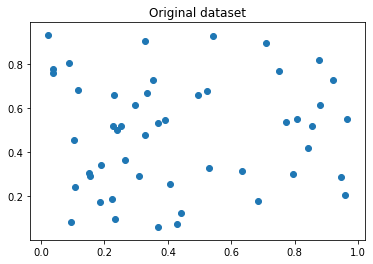

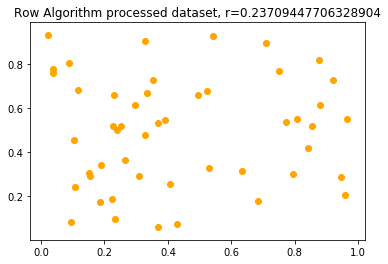

In [4]:
#Reduced dataset
X_reduced = np.empty([0,np.shape(X)[1]])
for k in range(n):
    if np.any( np.isnan(exemplars[k]) ):continue
    #print(exemplars[k])
    X_reduced = np.vstack((X_reduced, exemplars[k]))
    
#plot first two dimensions of original and reduced datasets.
X_original = np.asarray(X)
plt.figure(0)
plt.scatter(X_original[:,0], X_original[:,1])
plt.title('Original dataset')

X_reduced = np.asarray(X_reduced)
plt.figure(1)
plt.scatter(X_reduced[:,0], X_reduced[:,1],color='orange')
plt.title(f'Row Algorithm processed dataset, r={r}')